In [1]:
from keras.datasets import imdb

(train_data,train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
train_labels[0]

1

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
word_index = imdb.get_word_index() #word_index 是一个将单词映射为整数索引的字典
reverse_word_index=dict( 
        [(value,key) for (key,value) in word_index.items()])#键值颠倒，将整数索引映射为单词

#将评论解码。注意：索引减去3，因为0、1、2是"padding"(填充)、“start of sequence”（序列开始)、"unknown"（未知词）分别保留的索引
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

decoded_review


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [5]:
import numpy as np

def vectorize_sequences(sequences,dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i, sequences in enumerate(sequences):
        results[i,sequences] = 1.  # 将results[i]的指定索引设为1
    return results

x_train = vectorize_sequences(train_data) #将训练数据向量化
x_test = vectorize_sequences(test_data) #将测试数据向量化

x_train[0]


array([0., 1., 1., ..., 0., 0., 0.])

In [6]:
y_train = np.asanyarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [9]:
from keras import optimizers
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [21]:
#train_data

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [55]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 216us/step - loss: 0.5769 - acc: 0.7538 - val_loss: 0.4668 - val_acc: 0.8494
Epoch 2/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.3777 - acc: 0.8923 - val_loss: 0.3583 - val_acc: 0.8785
Epoch 3/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.2676 - acc: 0.9208 - val_loss: 0.3145 - val_acc: 0.8760
Epoch 4/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.2065 - acc: 0.9381 - val_loss: 0.2797 - val_acc: 0.8890
Epoch 5/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.1680 - acc: 0.9485 - val_loss: 0.2771 - val_acc: 0.8875
Epoch 6/20
15000/15000 [==============================] - 2s 162us/step - loss: 0.1381 - acc: 0.9591 - val_loss: 0.2838 - val_acc: 0.8868
Epoch 7/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.1144 - acc: 0.9663 - val_loss: 0.2982 - 

In [56]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+1)
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

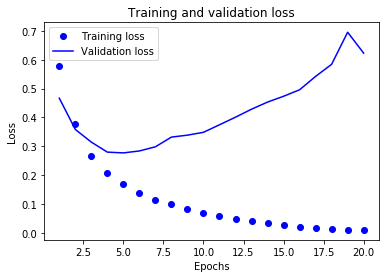

In [57]:
import matplotlib.pyplot as plt

%matplotlib inline



plt.plot(epochs,loss_values,'bo',label='Training loss') #'bo'表示蓝色圆点
plt.plot(epochs,val_loss_values,'b',label='Validation loss') #'b'表示蓝色实线
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

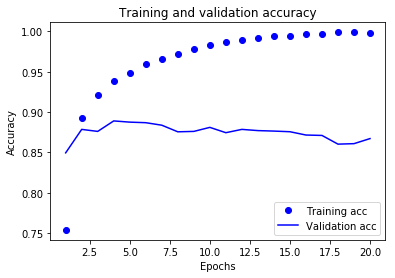

In [58]:
plt.clf()  #清空图像

acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs,acc,'bo', label='Training acc')
plt.plot(epochs,val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [19]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test,y_test)

results

Epoch 1/4
25000/25000 [==============================] - 5s 203us/step - loss: 0.4465 - acc: 0.8244
Epoch 2/4
25000/25000 [==============================] - 3s 117us/step - loss: 0.2556 - acc: 0.9101
Epoch 3/4
25000/25000 [==============================] - 3s 107us/step - loss: 0.1969 - acc: 0.9302
Epoch 4/4
25000/25000 [==============================] - 9s 345us/step


[0.31699040955543517, 0.87528]

In [20]:
model.predict(x_test)

array([[0.29781196],
       [0.9996749 ],
       [0.93921053],
       ...,
       [0.16541392],
       [0.15662622],
       [0.7538595 ]], dtype=float32)

In [68]:
model32 = models.Sequential()
model32.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
#model32.add(layers.Dense(16, activation='tanh' ))
model32.add(layers.Dense(16, activation='relu' ))
model32.add(layers.Dense(1, activation='sigmoid'))

model32.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])
history32 = model32.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val,y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 219us/step - loss: 0.5011 - acc: 0.7892 - val_loss: 0.3811 - val_acc: 0.8628
Epoch 2/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.3035 - acc: 0.9020 - val_loss: 0.3230 - val_acc: 0.8756
Epoch 3/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.2219 - acc: 0.9285 - val_loss: 0.3128 - val_acc: 0.8710
Epoch 4/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.1774 - acc: 0.9417 - val_loss: 0.2831 - val_acc: 0.8868
Epoch 5/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.1433 - acc: 0.9545 - val_loss: 0.2779 - val_acc: 0.8900
Epoch 6/20
15000/15000 [==============================] - 2s 163us/step - loss: 0.1160 - acc: 0.9641 - val_loss: 0.2900 - val_acc: 0.8865
Epoch 7/20
15000/15000 [==============================] - 2s 165us/step - loss: 0.0982 - acc: 0.9703 - val_loss: 0.3075 - 

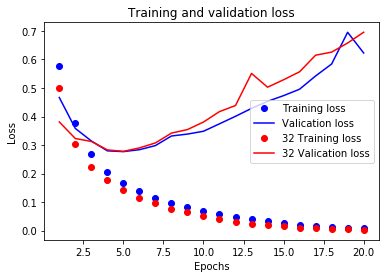

In [69]:
history32_dict = history32.history

plt.plot(epochs, history_dict['loss'],'bo', label='Training loss')
plt.plot(epochs, history_dict['val_loss'],'b', label='Valication loss')
plt.plot(epochs, history32_dict['loss'], 'ro', label='32 Training loss')
plt.plot(epochs, history32_dict['val_loss'],'r', label='32 Valication loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [34]:
history32_dict.keys()

dict_keys(['loss', 'acc'])

In [35]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

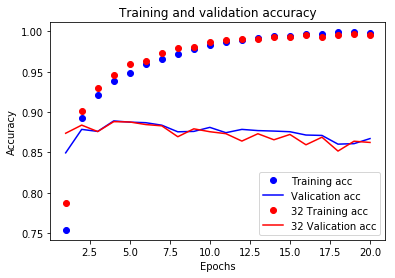

In [67]:
plt.clf()

plt.plot(epochs, history_dict['acc'],'bo', label='Training acc')
plt.plot(epochs, history_dict['val_acc'],'b', label='Valication acc')
plt.plot(epochs, history32_dict['acc'], 'ro', label='32 Training acc')
plt.plot(epochs, history32_dict['val_acc'],'r', label='32 Valication acc')

plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()